In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
! wget https://s3.amazonaws.com/imcbucket/data/flights/2008.csv
raw_pd = pd.read_csv("2008.csv").sample(frac=0.1,random_state=123)


--2021-05-26 14:19:39--  https://s3.amazonaws.com/imcbucket/data/flights/2008.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.65.86
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.65.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [binary/octet-stream]
Saving to: ‘2008.csv.1’

2008.csv.1          100%[===================>] 657.48M  44.2MB/s    in 16s     

2021-05-26 14:19:56 (41.4 MB/s) - ‘2008.csv.1’ saved [689413344/689413344]



## 1. Business Understanding

## 2. Data Understanding

#### 2.1 ดู contents 5 rows แรก

In [3]:
raw_pd.head(5).transpose()

,3344299,6331966,3907783,5586834,1927002
Year,2008,2008,2008,2008,2008
Month,6,11,7,10,4
DayofMonth,20,17,29,13,12
DayOfWeek,5,1,2,1,6
DepTime,957.0,1928.0,922.0,2234.0,635.0
CRSDepTime,955,1930,925,2235,635
ArrTime,1312.0,2029.0,1052.0,425.0,801.0
CRSArrTime,1321,2046,1109,433,802
UniqueCarrier,F9,NW,US,UA,YV
FlightNum,144,1225,1160,158,2727


#### 2.2 ดู Shape ของข้อมูล พบว่า เป็นแบบ 2 Dimensions

In [4]:
raw_pd.shape

(700973, 29)

#### 2.3 ดู Data Type ของแต่ละ Attributes

In [5]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700973 entries, 3344299 to 550331
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               700973 non-null  int64  
 1   Month              700973 non-null  int64  
 2   DayofMonth         700973 non-null  int64  
 3   DayOfWeek          700973 non-null  int64  
 4   DepTime            687508 non-null  float64
 5   CRSDepTime         700973 non-null  int64  
 6   ArrTime            685983 non-null  float64
 7   CRSArrTime         700973 non-null  int64  
 8   UniqueCarrier      700973 non-null  object 
 9   FlightNum          700973 non-null  int64  
 10  TailNum            692699 non-null  object 
 11  ActualElapsedTime  685685 non-null  float64
 12  CRSElapsedTime     700896 non-null  float64
 13  AirTime            685685 non-null  float64
 14  ArrDelay           685685 non-null  float64
 15  DepDelay           687508 non-null  float64
 

#### 2.4 ตรวจสอบค่า Null ในแต่ละ Attributes

In [6]:
raw_pd.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime               13465
CRSDepTime                0
ArrTime               14990
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                8274
ActualElapsedTime     15288
CRSElapsedTime           77
AirTime               15288
ArrDelay              15288
DepDelay              13465
Origin                    0
Dest                      0
Distance                  0
TaxiIn                14990
TaxiOut               13544
Cancelled                 0
CancellationCode     687388
Diverted                  0
CarrierDelay         548106
WeatherDelay         548106
NASDelay             548106
SecurityDelay        548106
LateAircraftDelay    548106
dtype: int64

In [7]:
# กำหนด Cols ที่ contain NULL แต่ธุรกิจจำเป็นต้องใช้
nullNeedCol_list = ['TaxiIn','TaxiOut','ArrDelay']

#### 2.5 EDA with Frequency Distribution เพื่อดู Bias

In [8]:
# Define categorical columns
categorical_list = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical_list}")

# Define numerical columns
numerical_list = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical_list}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


#### 2.6 EDA with Frequency Distribution of Categorical Values

In [9]:
for item_cat in categorical_list:
    print(raw_pd.groupby(item_cat).agg({item_cat:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

               UniqueCarrier
UniqueCarrier               
WN                 17.168850
AA                  8.631003
OO                  8.090326
MQ                  6.974591
UA                  6.443615
US                  6.437338
DL                  6.422929
XE                  5.294783
NW                  4.992917
CO                  4.270921
EV                  4.042381
FL                  3.739516
9E                  3.701712
YV                  3.619398
OH                  2.854033
B6                  2.792690
AS                  2.143877
F9                  1.373091
HA                  0.892759
AQ                  0.113271
          TailNum
TailNum          
N476HA   0.073481
N480HA   0.068139
N485HA   0.066984
N475HA   0.065685
N478HA   0.064097
...           ...
N197DN   0.000144
N1603    0.000144
N198UA   0.000144
N117UA   0.000144
N825MH   0.000144

[5325 rows x 1 columns]
          Origin
Origin          
ATL     5.932325
ORD     5.011463
DFW     3.957927
DEN     3.459049
L

In [10]:
for item_cat in categorical_list:
    print(raw_pd[item_cat].value_counts())

WN    120349
AA     60501
OO     56711
MQ     48890
UA     45168
US     45124
DL     45023
XE     37115
NW     34999
CO     29938
EV     28336
FL     26213
9E     25948
YV     25371
OH     20006
B6     19576
AS     15028
F9      9625
HA      6258
AQ       794
Name: UniqueCarrier, dtype: int64
N476HA    509
N480HA    472
N485HA    464
N475HA    455
N478HA    444
         ... 
N152DL      1
N182UA      1
N198UA      1
N1602       1
N229UA      1
Name: TailNum, Length: 5325, dtype: int64
ATL    41584
ORD    35129
DFW    27744
DEN    24247
LAX    21728
       ...  
DLG        9
ADK        9
GST        8
INL        7
TUP        1
Name: Origin, Length: 301, dtype: int64
ATL    41536
ORD    35026
DFW    28203
DEN    24258
LAX    21446
       ...  
AKN       10
ACY       10
INL       10
GST        5
TUP        2
Name: Dest, Length: 301, dtype: int64
B    5443
A    5405
C    2736
D       1
Name: CancellationCode, dtype: int64


#### 2.7 EDA with Frequency Distribution of Numerical Values

In [11]:
for item_num in numerical_list:
    print(raw_pd.groupby(item_num).agg({item_num:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

       Year
Year       
2008  100.0
          Month
Month          
7      8.959118
3      8.766243
8      8.704472
5      8.684072
6      8.678794
1      8.658393
4      8.502610
2      8.106589
10     7.897451
12     7.785321
9      7.707715
11     7.549221
            DayofMonth
DayofMonth            
14            3.368461
21            3.353767
7             3.348203
11            3.346349
3             3.341070
18            3.325806
10            3.324807
22            3.298415
17            3.297987
8             3.295705
24            3.290284
29            3.286432
20            3.285719
6             3.280440
4             3.278871
28            3.274306
2             3.272879
23            3.271738
9             3.267030
5             3.262037
15            3.257757
1             3.253763
25            3.248342
16            3.247486
12            3.244918
19            3.235360
13            3.219953
26            3.217813
27            3.173731
30            3.022085
31  

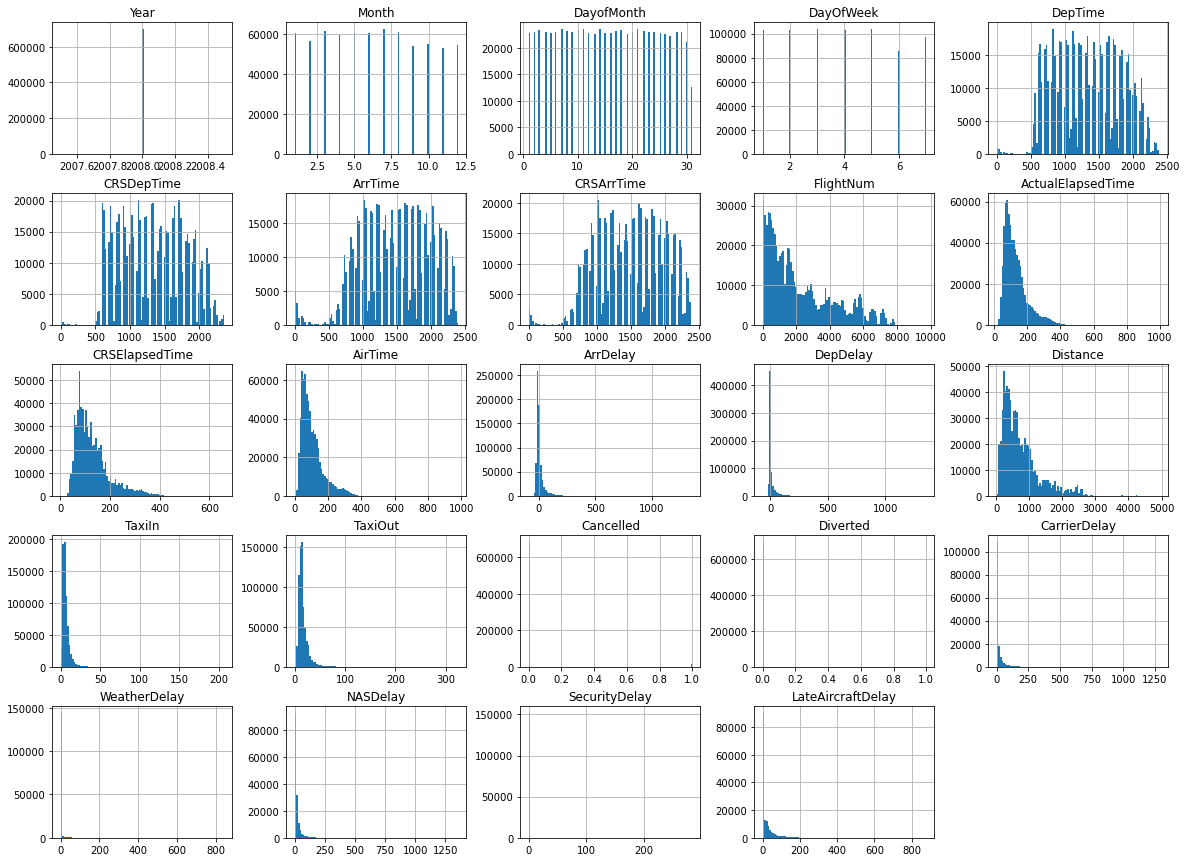

In [12]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

#### 2.8 EDA with Basic Stats. เพื่อดู Dispersion ของข้อมูล

In [13]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,700973.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,700973.0,6.378327,3.408742,1.0,3.0,6.0,9.0,12.0
DayofMonth,700973.0,15.715809,8.794939,1.0,8.0,16.0,23.0,31.0
DayOfWeek,700973.0,3.923444,1.986711,1.0,2.0,4.0,6.0,7.0
DepTime,687508.0,1333.990644,478.214318,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,700973.0,1326.283037,464.535761,1.0,925.0,1320.0,1715.0,2359.0
ArrTime,685983.0,1481.115031,505.477762,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,700973.0,1494.836323,482.941017,0.0,1115.0,1517.0,1908.0,2400.0
FlightNum,700973.0,2223.339565,1963.228581,1.0,619.0,1569.0,3519.0,9743.0
ActualElapsedTime,685685.0,127.393684,70.371994,14.0,77.0,109.0,157.0,1003.0


#### 2.9 กำหนด Candidated Features

In [14]:
noNullCol_list = []

In [15]:
for item_col in raw_pd.columns.to_list():
    if raw_pd[item_col].isnull().sum() == 0:
        noNullCol_list.append(item_col)
        

In [16]:
noNullCol_list

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'Origin',
 'Dest',
 'Distance',
 'Cancelled',
 'Diverted']

In [17]:
candidatedFeatures_list = noNullCol_list+nullNeedCol_list

In [18]:
candidatedFeatures_list

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'Origin',
 'Dest',
 'Distance',
 'Cancelled',
 'Diverted',
 'TaxiIn',
 'TaxiOut',
 'ArrDelay']

In [19]:
##### Revised 0.1
removedFeatures_list = ['Year','Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime','FlightNum','Cancelled',
 'Diverted']

In [20]:
candidatedFeatures_pd = raw_pd.filter(candidatedFeatures_list)\
.drop(removedFeatures_list, axis=1).dropna()

#### 2.10 EDA of Candidate Features with Checking for NULL

In [21]:
candidatedFeatures_pd.isnull().sum()

UniqueCarrier    0
Origin           0
Dest             0
Distance         0
TaxiIn           0
TaxiOut          0
ArrDelay         0
dtype: int64

In [22]:
candidatedFeatures_pd.count()

UniqueCarrier    685685
Origin           685685
Dest             685685
Distance         685685
TaxiIn           685685
TaxiOut          685685
ArrDelay         685685
dtype: int64

## 3. Data Preparation

## 4. Modeling (Features Transformation and ML Algorithms)

In [23]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

# Import modules for feature engineering and modeling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

#### 4.1 แบ่งแยก Training/Testing Set

In [24]:
train_df = candidatedFeatures_pd.sample(frac=0.8,random_state=123)

In [25]:
test_df = candidatedFeatures_pd.drop(train_df.index)

In [26]:
train_df.count()

UniqueCarrier    548548
Origin           548548
Dest             548548
Distance         548548
TaxiIn           548548
TaxiOut          548548
ArrDelay         548548
dtype: int64

In [27]:
test_df.count()

UniqueCarrier    137137
Origin           137137
Dest             137137
Distance         137137
TaxiIn           137137
TaxiOut          137137
ArrDelay         137137
dtype: int64

#### 4.2 แบ่งแยก Descriptive Features and Target Feature (Label) ออกจากกัน ตามหลักการของ Scikit Learnd

In [28]:
##### Revised 0.1
target_var = ['ArrDelay']

In [29]:
train_labels = train_df.filter(target_var)
train_df = train_df.loc[:, train_df.columns != target_var[0]]

In [30]:
test_labels = test_df.filter(target_var)
test_df = test_df.loc[:, test_df.columns != target_var[0]]

In [31]:
X_train = train_df

In [32]:
X_test = test_df

In [33]:
y_train = train_labels

In [34]:
y_test = test_labels

#### 4.3 ตรวจสอบว่า Features ไหนเป็น Categorical หรือ Numerical เพื่อเลือกทำ Transformation ให้เหมาะสมต่อไป

In [35]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest']
Numerical columns are: ['Distance', 'TaxiIn', 'TaxiOut']


#### 4.4 Define/Run a pipeline for transforming features and modeling

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', LinearRegression())])
pipeline_model = pipe.fit(X_train, y_train)

## 5. Model Evaluation

#### 5.1 คำนวณค่าตามเกณฑ์การประเมิน

In [38]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t Explained variance:", explained_variance_score(y_test, predictions))
print("\t Mean absolute error:", mean_absolute_error(y_test, predictions))
print("\t R2 score:", r2_score(y_test, predictions))

	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837


#### 5.2 เปรียบเทียบผลการทดลองในหลายๆ Algorithms

In [39]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR


In [40]:
regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR(),
    GaussianProcessRegressor(),
    SVR(kernel='linear'), 
]

In [41]:
head = 6
for model in regressors[:head]:
    start = time()
    evalPipeline_model = pipe.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = evalPipeline_model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\t Training time: %0.3fs" % train_time)
    print("\t Prediction time: %0.3fs" % predict_time)
    print("\t Explained variance:", explained_variance_score(y_test, predictions))
    print("\t Mean absolute error:", mean_absolute_error(y_test, predictions))
    print("\t R2 score:", r2_score(y_test, predictions))
    print()


LinearRegression()
	 Training time: 40.524s
	 Prediction time: 0.687s
	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837

RANSACRegressor()
	 Training time: 39.864s
	 Prediction time: 0.673s
	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837

KNeighborsRegressor()
	 Training time: 40.557s
	 Prediction time: 0.666s
	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837

KNeighborsRegressor(metric='manhattan', n_neighbors=9)
	 Training time: 40.125s
	 Prediction time: 0.702s
	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837

SVR()
	 Training time: 40.105s
	 Prediction time: 0.675s
	 Explained variance: 0.1435446219777462
	 Mean absolute error: 19.57294255010337
	 R2 score: 0.14354418131886837

LinearSVR()
	 Training time: 39.852s
	 Prediction 